In [13]:
import os
import sys
import csv
import matplotlib.pyplot as plt
import seaborn as sns

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(repo_root)

from src import *

In [24]:
process_directory_mean('data',  'ex01_mean_results.csv')
process_directory_prop('data',  'ex01_prop_results.csv')

In [33]:
prop_df = pd.read_csv('ex01_prop_results.csv')

prop_df = prop_df.groupby(['trainsize', 'N', 'M', 'K1', 'K2']).mean().reset_index()
print(prop_df)



     trainsize     N     M  K1  K2  prop_stdl_>_std  prop_ho_>_std  \
0     0.010000  1000  1000   2   4         0.953384       0.044545   
1     0.010000  1000  1000   2   5         0.937980       0.059242   
2     0.010000  1000  1000   6   9         0.789899       0.258030   
3     0.010000  1000  1000   6  10         0.779242       0.298586   
4     0.010000  1000  1500   3   3         0.926465       0.072761   
..         ...   ...   ...  ..  ..              ...            ...   
195   0.831764  1000  1000   6  10         0.209467       0.581657   
196   0.831764  1000  1500   3   3         0.389921       0.436759   
197   0.831764  1000  1500   5   7         0.257115       0.537747   
198   0.831764  1000  1500   6   8         0.219368       0.546838   
199   0.831764  1000  1500   8   8         0.189921       0.550000   

     prop_hol_>_std  prop_point_>_std  prop_spring_>_std  rep  
0          0.952626          0.941768           0.958384  9.5  
1          0.937626          0.

     trainsize     N     M  K1  K2  prop_stdl_>_std  prop_ho_>_std  \
5     0.010000  1000  1500   5   7         0.785488       0.250000   
13    0.012023  1000  1500   5   7         0.757422       0.286471   
21    0.014454  1000  1500   5   7         0.730527       0.317275   
29    0.017378  1000  1500   5   7         0.693758       0.360889   
37    0.020893  1000  1500   5   7         0.659598       0.399966   
45    0.025119  1000  1500   5   7         0.621497       0.437970   
53    0.030200  1000  1500   5   7         0.585911       0.480034   
61    0.036308  1000  1500   5   7         0.557331       0.517462   
69    0.043652  1000  1500   5   7         0.527003       0.544948   
77    0.052481  1000  1500   5   7         0.495464       0.565260   
85    0.063096  1000  1500   5   7         0.471444       0.582006   
93    0.075858  1000  1500   5   7         0.452523       0.596683   
101   0.091201  1000  1500   5   7         0.435374       0.604216   
109   0.109648  1000

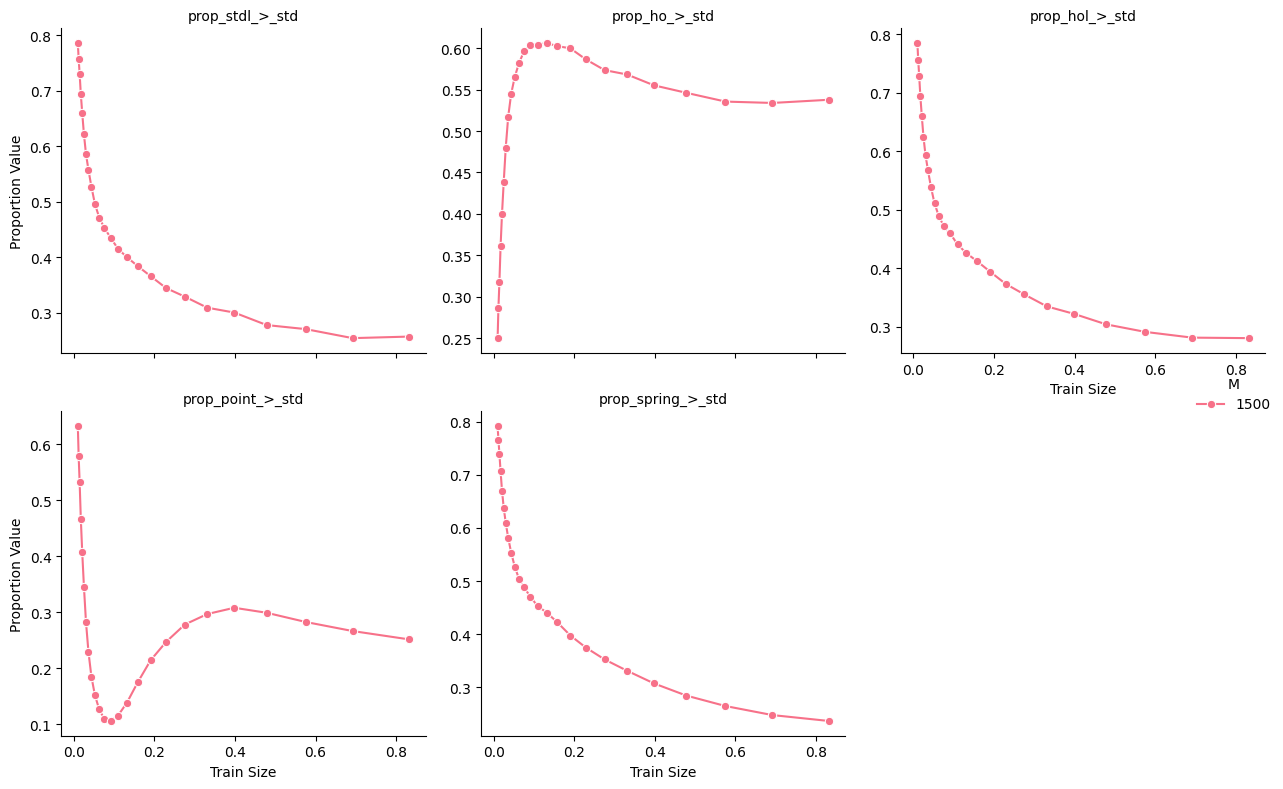

In [37]:
filtered_df = prop_df[(prop_df['K1'] == 5) & (prop_df['K2'] == 7)]
print(filtered_df)


# Melt the DataFrame to have proportions in a single column
melted_df = filtered_df.melt(id_vars=['trainsize', 'M'], 
                             value_vars=['prop_stdl_>_std', 'prop_ho_>_std', 'prop_hol_>_std', 'prop_point_>_std', 'prop_spring_>_std'], 
                             var_name='Proportion', 
                             value_name='Value')

print(melted_df)

# Create a FacetGrid for each proportion
g = sns.FacetGrid(melted_df, col="Proportion", hue="M", col_wrap=3, height=4, palette="husl", sharey=False)
g.map(sns.lineplot, "trainsize", "Value", marker="o")

# Add legends and titles
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("Train Size", "Proportion Value")

plt.tight_layout()
plt.show()

## testing M 

NameError: name 'M_values' is not defined

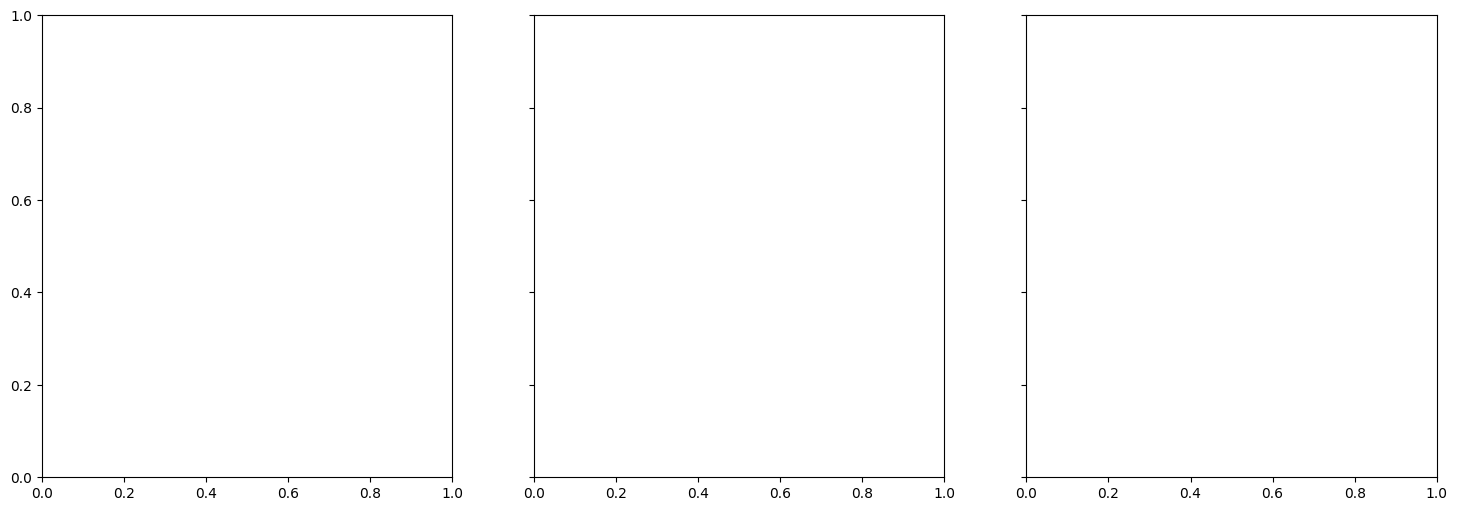

In [9]:
train_sizes = np.logspace(-2, 0, endpoint=False, num=25)


fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

M_values = ['']
for i, m in enumerate(M_values):
    ax = axes[i]
    ax.plot(train_sizes,  results_M_std[m], label='std_bt_likelihood')
    ax.plot(train_sizes, results_M_ho[m], label='ho_bt_likelihood')
    ax.hlines(1, 0.01, 1.0, colors='gray', linestyles='dashed')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Train size')
    ax.set_ylabel('Likelihood' if i == 0 else '')
    ax.set_title(f'M = {m}')
    ax.set_xscale('log')
    ax.legend()



plt.show()

## testing game size

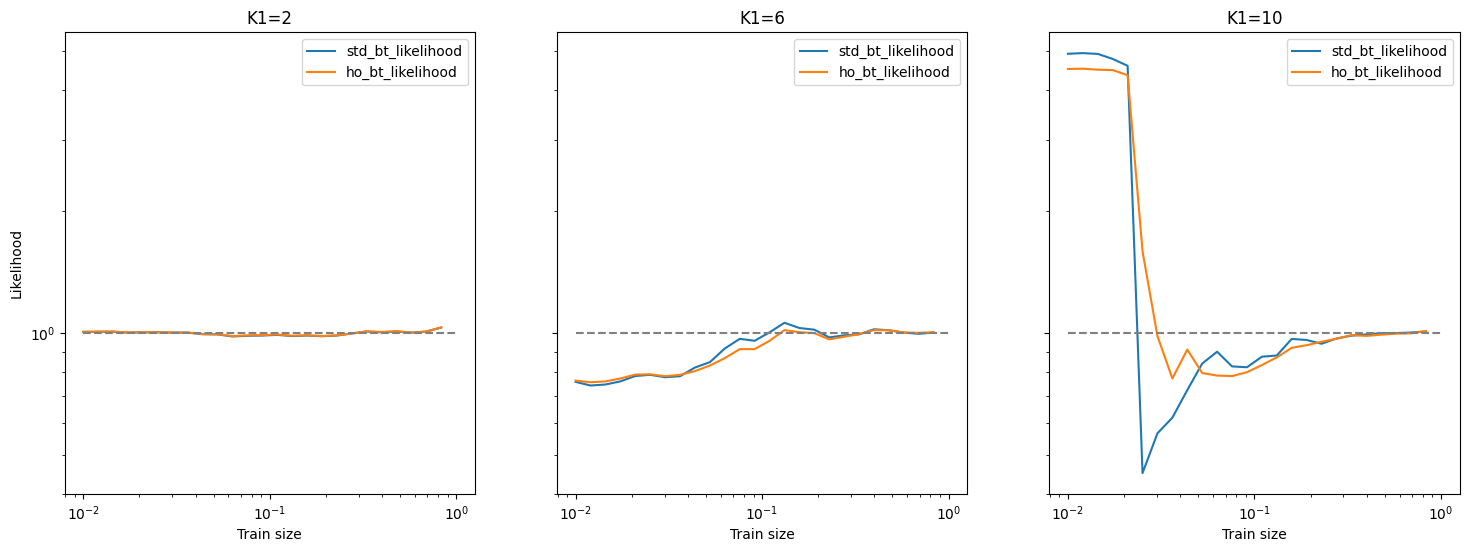

In [42]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, K1 in enumerate(K1_values):
    ax = axes[i]
    ax.plot(train_sizes, results_K_std[K1], label='std_bt_likelihood')
    ax.plot(train_sizes, results_K_ho[K1], label='ho_bt_likelihood')
    ax.hlines(1, 0.01, 1.0, colors='gray', linestyles='dashed')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Train size')
    ax.set_ylabel('Likelihood' if i == 0 else '')
    ax.set_title(f'K1={K1}')
    ax.set_xscale('log')
    ax.legend()